**Evan Pradipta Hardinatha-1103204160**

# Introduction
Machine Learning -> Learning Past Data to Discover Patterns and use it to Predict The Future

How to?
1. Prepare and Load Data
2. Build Model
3. Training Model
4. Making Prediction
5. Evaluating a Model
6. Saving The Model

In [44]:
#Importing The Important Library
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

# Prepare and Load Data
a. Creating The Data

In [45]:
# Create *known* parameters
weight = 0.6
bias = 0.4

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]))

b. Splitting the data
Use Train-Test-Split, 80% train 20% test

In [46]:
# Create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

c. Plotting Data Before The Prediction

In [47]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

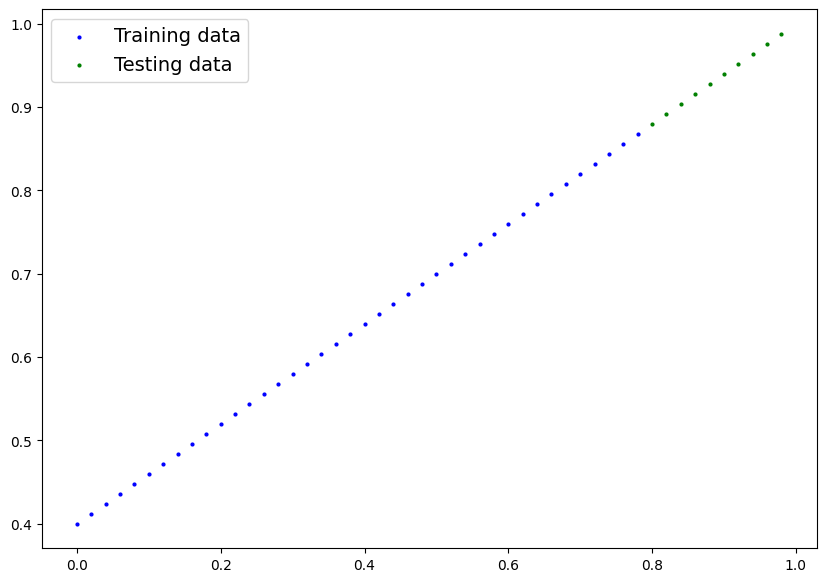

In [48]:
plot_predictions();

# Building The Model

In [49]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),  requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [50]:
# Set manual seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s)
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [51]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [52]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [53]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


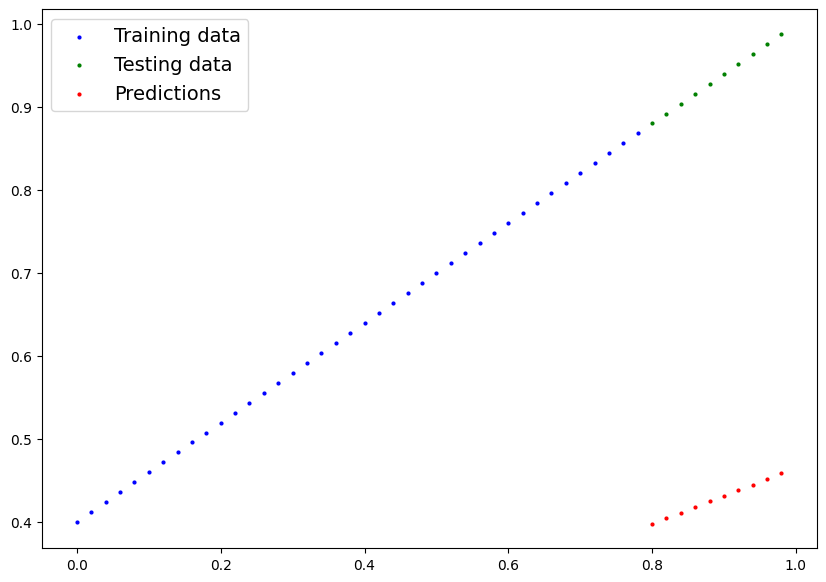

In [54]:
plot_predictions(predictions=y_preds)

In [55]:
y_test - y_preds

tensor([[0.4818],
        [0.4871],
        [0.4924],
        [0.4976],
        [0.5029],
        [0.5082],
        [0.5134],
        [0.5187],
        [0.5240],
        [0.5292]])

3

# Train Model

a. Loss Function

In [56]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

b. Optimization Loop in PyTorch
Training Loop and Testing Loop

In [57]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.37388134002685547 | MAE Test Loss: 0.4920651316642761 
Epoch: 10 | MAE Train Loss: 0.2586713433265686 | MAE Test Loss: 0.3573552668094635 
Epoch: 20 | MAE Train Loss: 0.1434614360332489 | MAE Test Loss: 0.2226453274488449 
Epoch: 30 | MAE Train Loss: 0.03848728537559509 | MAE Test Loss: 0.09741605818271637 
Epoch: 40 | MAE Train Loss: 0.023863982409238815 | MAE Test Loss: 0.05760536342859268 
Epoch: 50 | MAE Train Loss: 0.02031884901225567 | MAE Test Loss: 0.04659420996904373 
Epoch: 60 | MAE Train Loss: 0.01688215509057045 | MAE Test Loss: 0.039008546620607376 
Epoch: 70 | MAE Train Loss: 0.013453716412186623 | MAE Test Loss: 0.030736004933714867 
Epoch: 80 | MAE Train Loss: 0.010015235282480717 | MAE Test Loss: 0.02246345952153206 
Epoch: 90 | MAE Train Loss: 0.0065802233293652534 | MAE Test Loss: 0.01487780176103115 


Checking the loss after looping

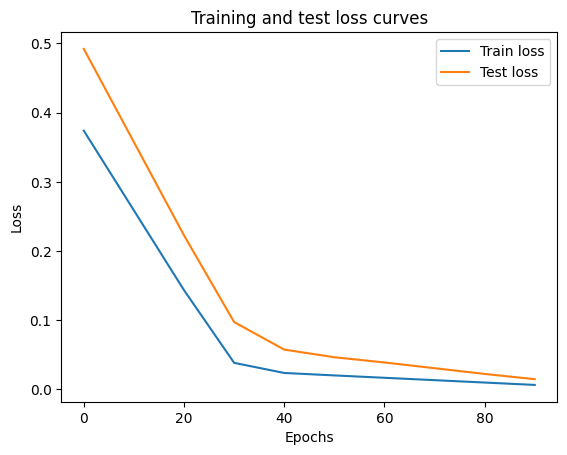

In [58]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Why Did The Loss Break Down?
We can inspect with state dict

In [59]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5843])), ('bias', tensor([0.4063]))])

And the original values for weights and bias are:
weights: 0.6, bias: 0.4


# Predicting with test data

In [60]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8737],
        [0.8854],
        [0.8971],
        [0.9088],
        [0.9205],
        [0.9321],
        [0.9438],
        [0.9555],
        [0.9672],
        [0.9789]])

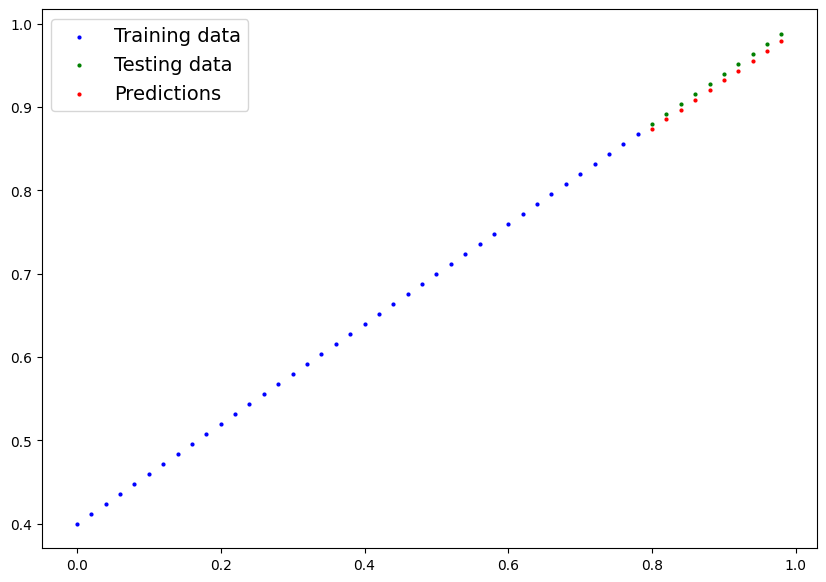

In [61]:
plot_predictions(predictions=y_preds)

# Saving Model

a. Creating the model saving

In [62]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


b. Check the file

In [63]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Jan  4 17:07 models/01_pytorch_workflow_model_0.pth


c. Loading the model

In [64]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

d. Checking if The Loaded Model is The Same

In [65]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [66]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])